# Introduction

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#importing data

df = pd.read_excel (r'C:\Users\chandu\Desktop\Internship\Task -10( Hypothesis Testing)\Task - 10(Hypothesis Testing)\aspiring_minds_employability_outcomes_2015.xlsx') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
print (df)

     Unnamed: 0      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01              present   
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1               assistant manager    

In [11]:
#displaing head
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
#displaying shape
print(df.shape)

(3998, 39)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [17]:
#diplaying description
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Univariate Analysis
- Histogram

(array([307., 329., 648., 276., 516., 263., 412., 372., 482., 393.]),
 array([  11244. ,  139947.1,  268650.2,  397353.3,  526056.4,  654759.5,
         783462.6,  912165.7, 1040868.8, 1169571.9, 1298275. ]),
 <BarContainer object of 10 artists>)

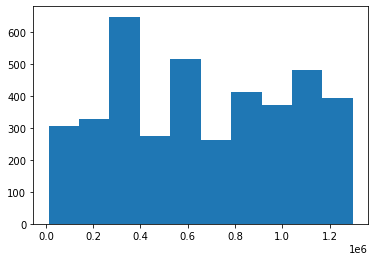

In [20]:
plt.hist(df['ID'])

(array([3.398e+03, 5.500e+02, 2.700e+01, 6.000e+00, 8.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([  35000.,  431500.,  828000., 1224500., 1621000., 2017500.,
        2414000., 2810500., 3207000., 3603500., 4000000.]),
 <BarContainer object of 10 artists>)

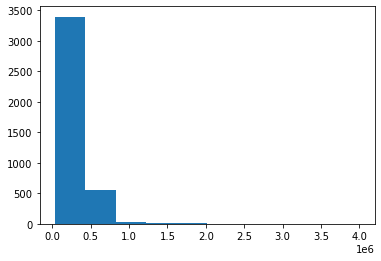

In [27]:
plt.hist(df['Salary'])

(array([ 12.,  50., 132., 240., 446., 636., 811., 850., 677., 144.]),
 array([43.   , 48.476, 53.952, 59.428, 64.904, 70.38 , 75.856, 81.332,
        86.808, 92.284, 97.76 ]),
 <BarContainer object of 10 artists>)

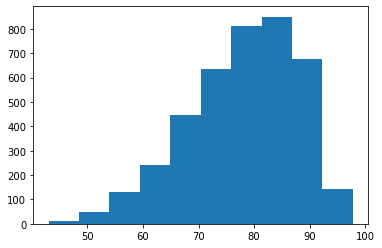

In [28]:
plt.hist(df['10percentage'])

(array([  8.,  55., 160., 489., 657., 768., 696., 551., 413., 201.]),
 array([40.  , 45.87, 51.74, 57.61, 63.48, 69.35, 75.22, 81.09, 86.96,
        92.83, 98.7 ]),
 <BarContainer object of 10 artists>)

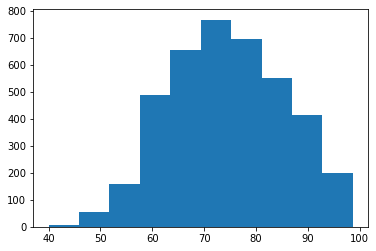

In [30]:
plt.hist(df['12percentage'])

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.600e+01, 2.500e+01, 2.330e+02,
        9.350e+02, 1.987e+03, 7.880e+02, 1.100e+01]),
 array([1995. , 1996.8, 1998.6, 2000.4, 2002.2, 2004. , 2005.8, 2007.6,
        2009.4, 2011.2, 2013. ]),
 <BarContainer object of 10 artists>)

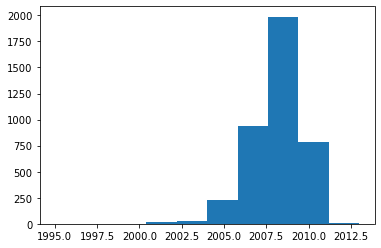

In [31]:
plt.hist(df['12graduation'])

(array([1499.,  439.,  412.,  346.,  421.,  207.,  326.,  221.,   88.,
          39.]),
 array([2.00000e+00, 1.84270e+03, 3.68340e+03, 5.52410e+03, 7.36480e+03,
        9.20550e+03, 1.10462e+04, 1.28869e+04, 1.47276e+04, 1.65683e+04,
        1.84090e+04]),
 <BarContainer object of 10 artists>)

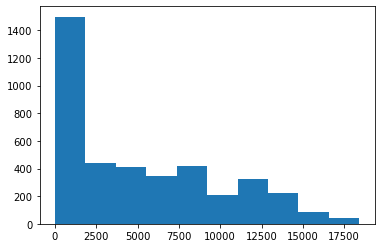

In [32]:
plt.hist(df['CollegeID'])

(array([ 297.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3701.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

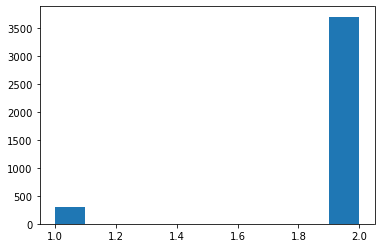

In [33]:
plt.hist(df['CollegeTier'])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 2.020e+02, 1.365e+03, 2.424e+03]),
 array([ 7821. ,  8715.9,  9610.8, 10505.7, 11400.6, 12295.5, 13190.4,
        14085.3, 14980.2, 15875.1, 16770. ]),
 <BarContainer object of 10 artists>)

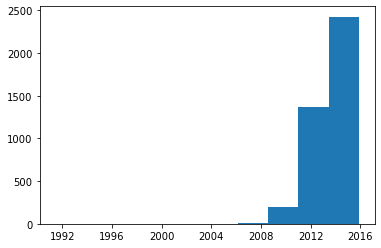

In [34]:
plt.hist(df['DOJ'])

(array([1.000e+00, 1.000e+00, 5.000e+00, 3.200e+01, 1.270e+02, 6.530e+02,
        1.518e+03, 1.529e+03, 1.300e+02, 2.000e+00]),
 array([ 2859. ,  3573.9,  4288.8,  5003.7,  5718.6,  6433.5,  7148.4,
         7863.3,  8578.2,  9293.1, 10008. ]),
 <BarContainer object of 10 artists>)

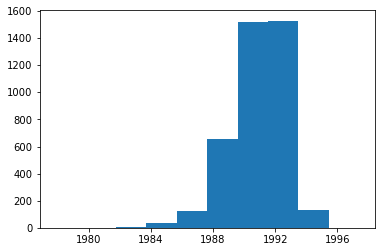

In [35]:
plt.hist(df['DOB'])

(array([  12.,    0.,    0.,    0.,   14.,  424., 1569., 1618.,  334.,
          27.]),
 array([ 6.45 , 15.798, 25.146, 34.494, 43.842, 53.19 , 62.538, 71.886,
        81.234, 90.582, 99.93 ]),
 <BarContainer object of 10 artists>)

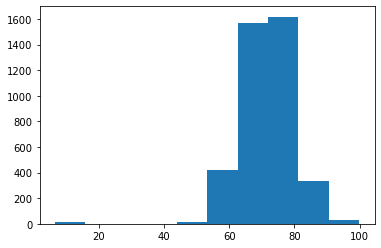

In [36]:
plt.hist(df['collegeGPA'])

(array([1499.,  439.,  412.,  346.,  421.,  207.,  326.,  221.,   88.,
          39.]),
 array([2.00000e+00, 1.84270e+03, 3.68340e+03, 5.52410e+03, 7.36480e+03,
        9.20550e+03, 1.10462e+04, 1.28869e+04, 1.47276e+04, 1.65683e+04,
        1.84090e+04]),
 <BarContainer object of 10 artists>)

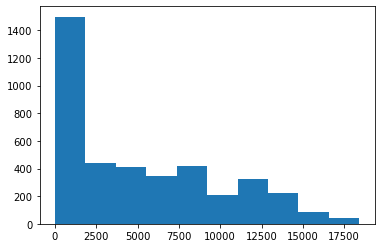

In [37]:
plt.hist(df['CollegeCityID'])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.997e+03]),
 array([   0. ,  201.7,  403.4,  605.1,  806.8, 1008.5, 1210.2, 1411.9,
        1613.6, 1815.3, 2017. ]),
 <BarContainer object of 10 artists>)

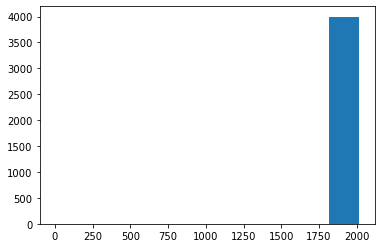

In [38]:
plt.hist(df['GraduationYear'])

(array([   6.,  109.,  487.,  813., 1031.,  819.,  484.,  197.,   47.,
           5.]),
 array([180. , 249.5, 319. , 388.5, 458. , 527.5, 597. , 666.5, 736. ,
        805.5, 875. ]),
 <BarContainer object of 10 artists>)

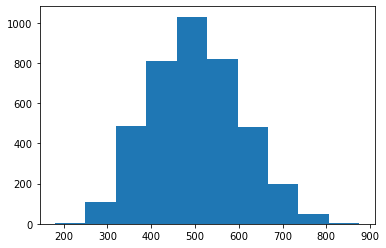

In [39]:
plt.hist(df['English'])

(array([  13.,   52.,  237.,  532.,  906., 1022.,  841.,  343.,   49.,
           3.]),
 array([195., 255., 315., 375., 435., 495., 555., 615., 675., 735., 795.]),
 <BarContainer object of 10 artists>)

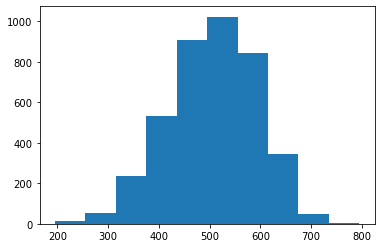

In [40]:
plt.hist(df['Logical'])

(array([ 18.,  87., 261., 675., 863., 978., 739., 259.,  91.,  27.]),
 array([120., 198., 276., 354., 432., 510., 588., 666., 744., 822., 900.]),
 <BarContainer object of 10 artists>)

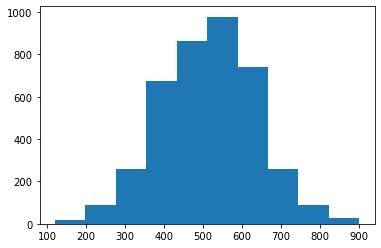

In [41]:
plt.hist(df['Quant'])

(array([ 246.,    0.,    0.,    0.,    0.,  339.,  658.,  604.,  975.,
        1176.]),
 array([-1.00000000e+00, -8.00008959e-01, -6.00017918e-01, -4.00026878e-01,
        -2.00035837e-01, -4.47961843e-05,  1.99946245e-01,  3.99937285e-01,
         5.99928326e-01,  7.99919367e-01,  9.99910408e-01]),
 <BarContainer object of 10 artists>)

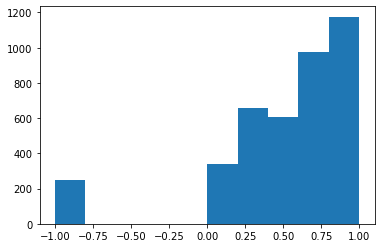

In [42]:
plt.hist(df['Domain'])

(array([ 868.,   19.,   39.,  316.,  777., 1054.,  689.,  193.,   41.,
           2.]),
 array([ -1. ,  83.1, 167.2, 251.3, 335.4, 419.5, 503.6, 587.7, 671.8,
        755.9, 840. ]),
 <BarContainer object of 10 artists>)

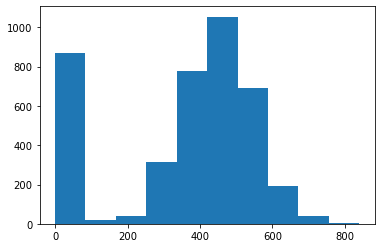

In [43]:
plt.hist(df['ComputerProgramming'])

(array([2854.,    0.,   19.,  136.,  312.,  359.,  153.,  116.,   43.,
           6.]),
 array([ -1. ,  60.3, 121.6, 182.9, 244.2, 305.5, 366.8, 428.1, 489.4,
        550.7, 612. ]),
 <BarContainer object of 10 artists>)

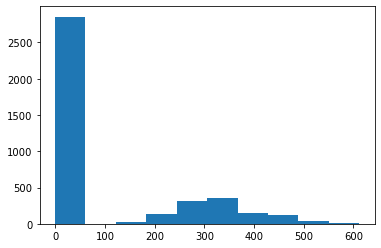

In [45]:
plt.hist(df['ElectronicsAndSemicon'])

(array([3.096e+03, 1.000e+00, 3.000e+00, 9.400e+01, 1.950e+02, 2.510e+02,
        2.550e+02, 6.700e+01, 2.400e+01, 1.200e+01]),
 array([ -1. ,  70.6, 142.2, 213.8, 285.4, 357. , 428.6, 500.2, 571.8,
        643.4, 715. ]),
 <BarContainer object of 10 artists>)

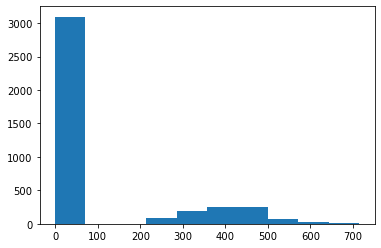

In [46]:
plt.hist(df['ComputerScience'])

(array([3.763e+03, 0.000e+00, 1.000e+00, 4.000e+00, 1.900e+01, 5.500e+01,
        7.000e+01, 5.200e+01, 2.200e+01, 1.200e+01]),
 array([ -1. ,  61.4, 123.8, 186.2, 248.6, 311. , 373.4, 435.8, 498.2,
        560.6, 623. ]),
 <BarContainer object of 10 artists>)

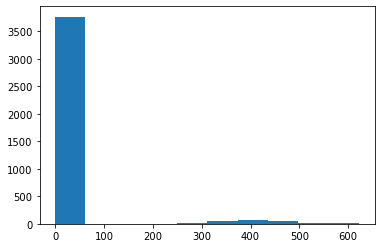

In [49]:
plt.hist(df['MechanicalEngg'])

(array([3837.,    0.,    0.,    8.,   19.,   36.,   43.,   29.,   18.,
           8.]),
 array([ -1. ,  66.7, 134.4, 202.1, 269.8, 337.5, 405.2, 472.9, 540.6,
        608.3, 676. ]),
 <BarContainer object of 10 artists>)

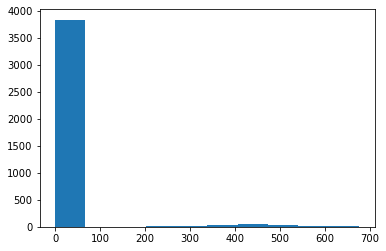

In [50]:
plt.hist(df['ElectricalEngg'])

(array([3.624e+03, 0.000e+00, 1.000e+00, 1.000e+01, 5.200e+01, 8.900e+01,
        8.700e+01, 8.500e+01, 3.400e+01, 1.600e+01]),
 array([ -1. ,  53.9, 108.8, 163.7, 218.6, 273.5, 328.4, 383.3, 438.2,
        493.1, 548. ]),
 <BarContainer object of 10 artists>)

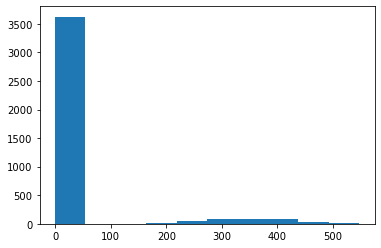

In [51]:
plt.hist(df['TelecomEngg'])

(array([3.956e+03, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.300e+01,
        1.200e+01, 6.000e+00, 5.000e+00, 4.000e+00]),
 array([ -1. ,  50.7, 102.4, 154.1, 205.8, 257.5, 309.2, 360.9, 412.6,
        464.3, 516. ]),
 <BarContainer object of 10 artists>)

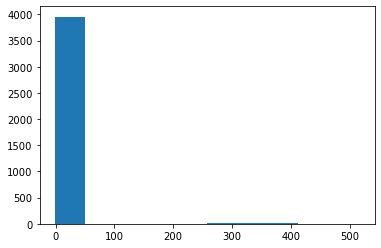

In [52]:
plt.hist(df['CivilEngg'])

(array([   7.,   23.,   60.,  177.,  369.,  540., 1009.,  867.,  642.,
         304.]),
 array([-4.1267, -3.5145, -2.9023, -2.2901, -1.6779, -1.0657, -0.4535,
         0.1587,  0.7709,  1.3831,  1.9953]),
 <BarContainer object of 10 artists>)

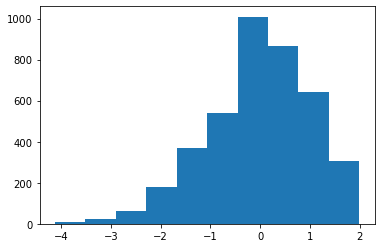

In [53]:
plt.hist(df['conscientiousness'])

(array([   6.,    7.,    8.,   23.,   79.,  187.,  668., 1183., 1357.,
         480.]),
 array([-5.7816 , -5.01296, -4.24432, -3.47568, -2.70704, -1.9384 ,
        -1.16976, -0.40112,  0.36752,  1.13616,  1.9048 ]),
 <BarContainer object of 10 artists>)

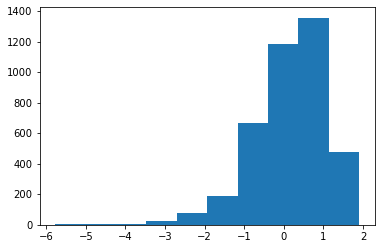

In [54]:
plt.hist(df['agreeableness'])

(array([   5.,   10.,   25.,  132.,  406.,  767., 1249., 1000.,  340.,
          64.]),
 array([-4.6009 , -3.88727, -3.17364, -2.46001, -1.74638, -1.03275,
        -0.31912,  0.39451,  1.10814,  1.82177,  2.5354 ]),
 <BarContainer object of 10 artists>)

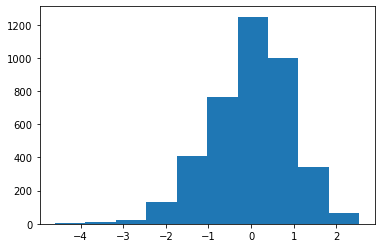

In [55]:
plt.hist(df['extraversion'])

(array([108., 317., 647., 834., 899., 631., 371., 140.,  42.,   9.]),
 array([-2.643  , -2.04345, -1.4439 , -0.84435, -0.2448 ,  0.35475,
         0.9543 ,  1.55385,  2.1534 ,  2.75295,  3.3525 ]),
 <BarContainer object of 10 artists>)

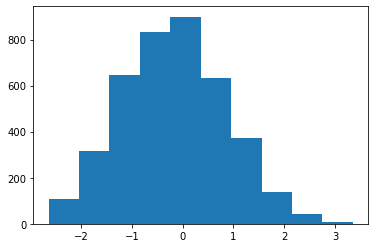

In [56]:
plt.hist(df['nueroticism'])

(array([   7.,    5.,    7.,   11.,   40.,  127.,  439., 1389., 1536.,
         437.]),
 array([-7.3757 , -6.45589, -5.53608, -4.61627, -3.69646, -2.77665,
        -1.85684, -0.93703, -0.01722,  0.90259,  1.8224 ]),
 <BarContainer object of 10 artists>)

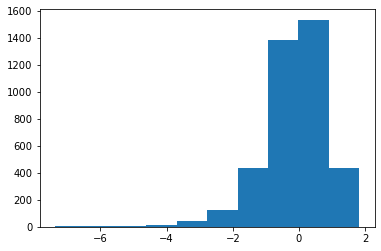

In [57]:
plt.hist(df['openess_to_experience'])

- Boxplot

<AxesSubplot:title={'center':'ComputerScience'}, xlabel='Salary'>

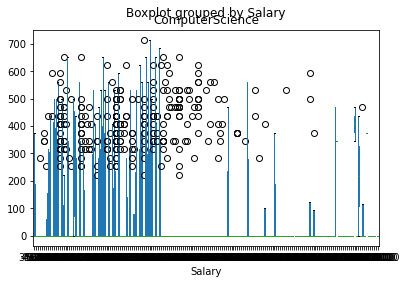

In [25]:
df.boxplot(by ='Salary', column =['ComputerScience'], grid = False)

<AxesSubplot:title={'center':'Salary'}, xlabel='ID'>

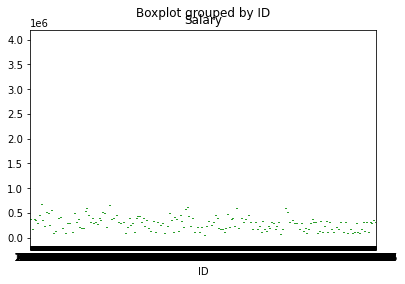

In [58]:
df.boxplot(by ='ID', column =['Salary'], grid = False)

<AxesSubplot:title={'center':'nueroticism'}, xlabel='openess_to_experience'>

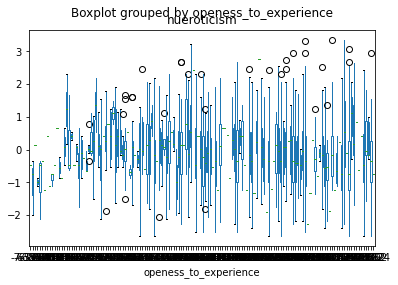

In [61]:
df.boxplot(by ='openess_to_experience', column =['nueroticism'], grid = False)

<AxesSubplot:title={'center':'agreeableness'}, xlabel='extraversion'>

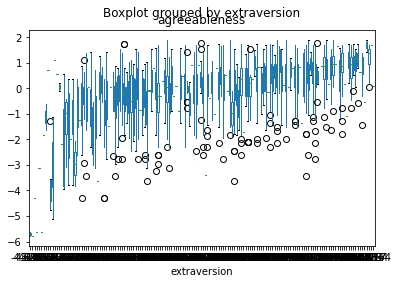

In [62]:
df.boxplot(by ='extraversion', column =['agreeableness'], grid = False)

- countplot


<AxesSubplot:xlabel='Salary', ylabel='count'>

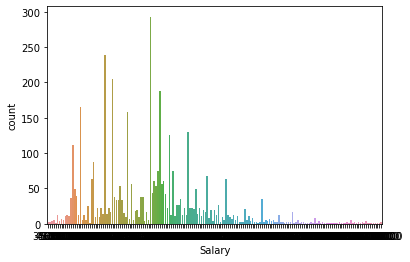

In [26]:
sns.countplot(x ='Salary', data = df)

<AxesSubplot:xlabel='ID', ylabel='count'>

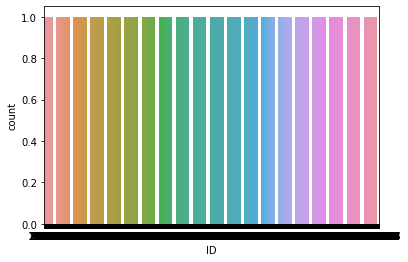

In [63]:
sns.countplot(x ='ID', data = df)

<AxesSubplot:xlabel='DOJ', ylabel='count'>

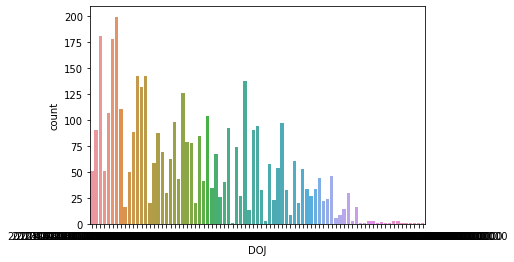

In [64]:
sns.countplot(x ='DOJ', data = df)

<AxesSubplot:xlabel='10board', ylabel='count'>

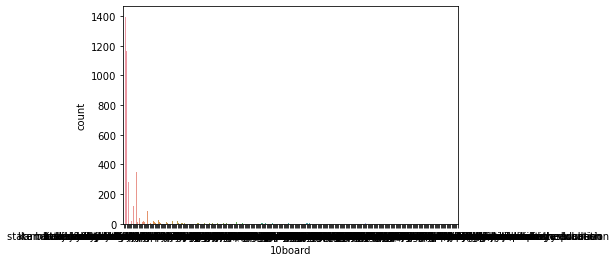

In [66]:
sns.countplot(x ='10board', data = df)

<AxesSubplot:xlabel='10percentage', ylabel='count'>

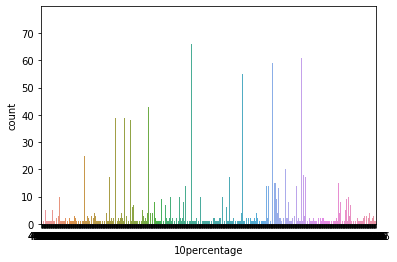

In [67]:
sns.countplot(x ='10percentage', data = df)

<AxesSubplot:xlabel='12graduation', ylabel='count'>

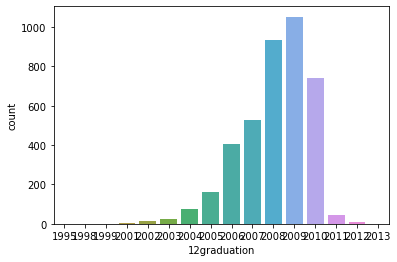

In [68]:
sns.countplot(x ='12graduation', data = df)

<AxesSubplot:xlabel='12percentage', ylabel='count'>

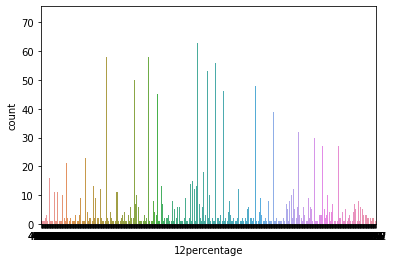

In [69]:
sns.countplot(x ='12percentage', data = df)

<AxesSubplot:xlabel='12board', ylabel='count'>

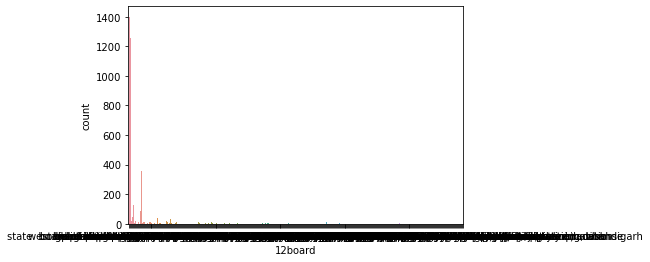

In [70]:
sns.countplot(x ='12board', data = df)

<AxesSubplot:xlabel='CollegeID', ylabel='count'>

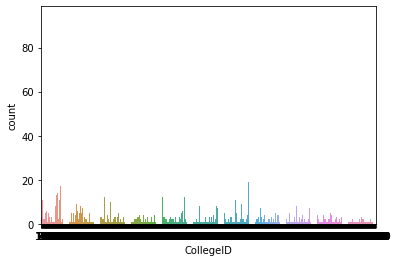

In [71]:
sns.countplot(x ='CollegeID', data = df)

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

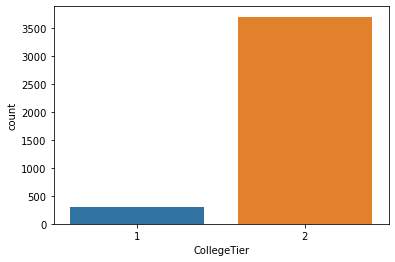

In [72]:
sns.countplot(x ='CollegeTier', data = df)

<AxesSubplot:xlabel='CollegeState', ylabel='count'>

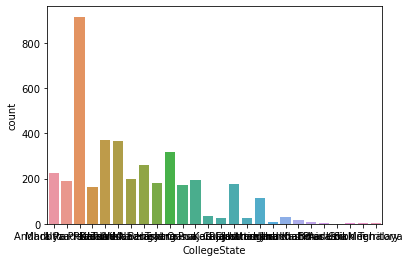

In [73]:
sns.countplot(x ='CollegeState', data = df)

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

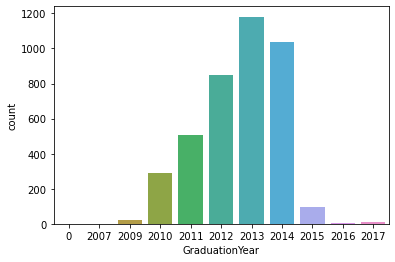

In [74]:
sns.countplot(x ='GraduationYear', data = df)

<AxesSubplot:xlabel='English', ylabel='count'>

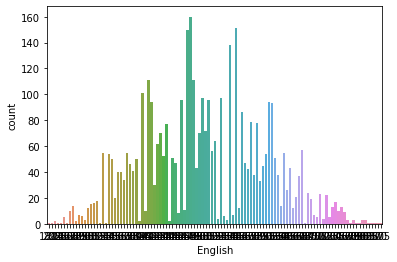

In [75]:
sns.countplot(x ='English', data = df)

<AxesSubplot:xlabel='Logical', ylabel='count'>

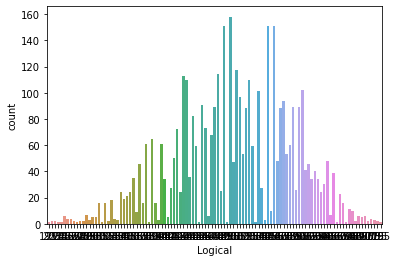

In [76]:
sns.countplot(x ='Logical', data = df)

<AxesSubplot:xlabel='Quant', ylabel='count'>

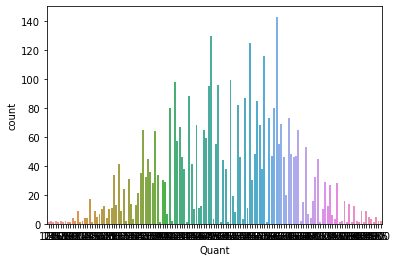

In [77]:
sns.countplot(x ='Quant', data = df)

<AxesSubplot:xlabel='Domain', ylabel='count'>

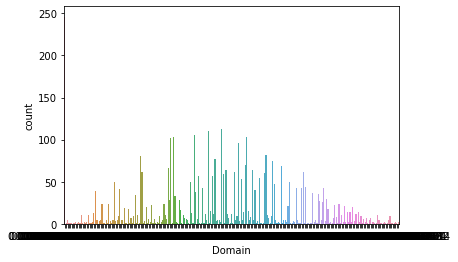

In [78]:
sns.countplot(x ='Domain', data = df)

<AxesSubplot:xlabel='ComputerProgramming', ylabel='count'>

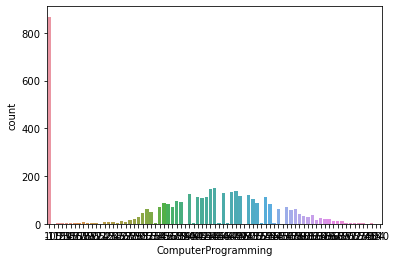

In [79]:
sns.countplot(x ='ComputerProgramming', data = df)

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='count'>

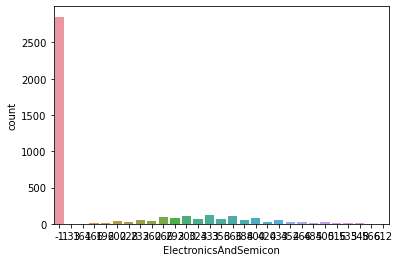

In [81]:
sns.countplot(x ='ElectronicsAndSemicon', data = df)

<AxesSubplot:xlabel='ComputerScience', ylabel='count'>

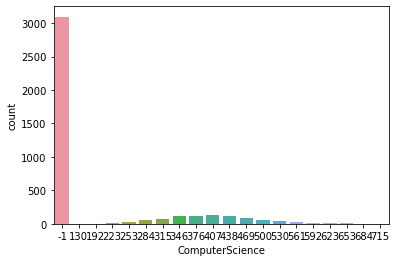

In [82]:
sns.countplot(x ='ComputerScience', data = df)

<AxesSubplot:xlabel='MechanicalEngg', ylabel='count'>

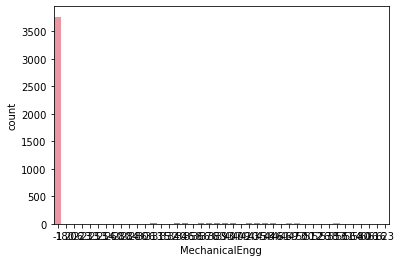

In [83]:
sns.countplot(x ='MechanicalEngg', data = df)

<AxesSubplot:xlabel='ElectricalEngg', ylabel='count'>

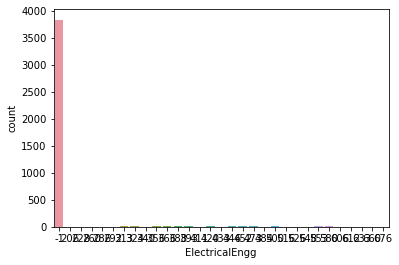

In [84]:
sns.countplot(x ='ElectricalEngg', data = df)

<AxesSubplot:xlabel='TelecomEngg', ylabel='count'>

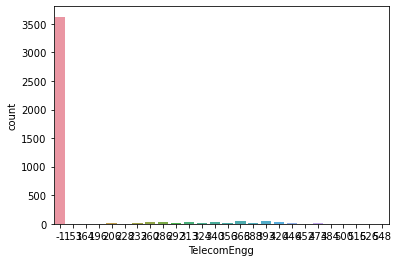

In [85]:
sns.countplot(x ='TelecomEngg', data = df)

<AxesSubplot:xlabel='CivilEngg', ylabel='count'>

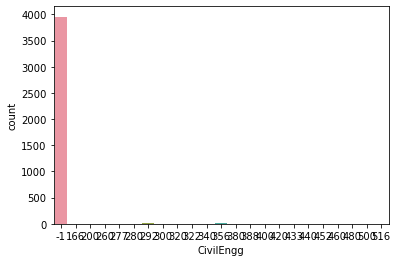

In [86]:
sns.countplot(x ='CivilEngg', data = df)

<AxesSubplot:xlabel='conscientiousness', ylabel='count'>

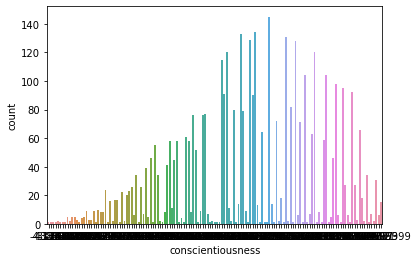

In [87]:
sns.countplot(x ='conscientiousness', data = df)

<AxesSubplot:xlabel='agreeableness', ylabel='count'>

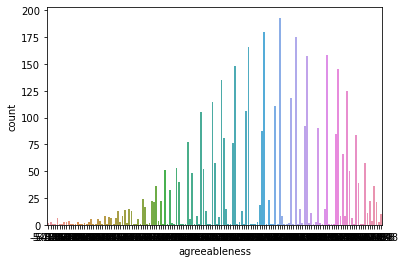

In [88]:
sns.countplot(x ='agreeableness', data = df)

<AxesSubplot:xlabel='extraversion', ylabel='count'>

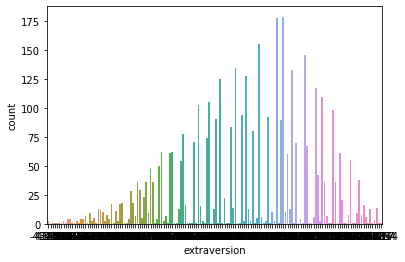

In [89]:
sns.countplot(x ='extraversion', data = df)

<AxesSubplot:xlabel='nueroticism', ylabel='count'>

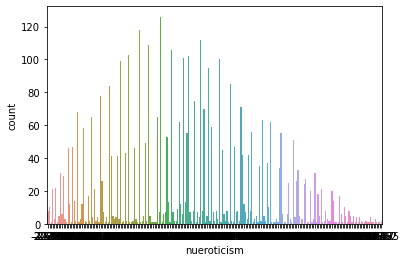

In [90]:
sns.countplot(x ='nueroticism', data = df)

<AxesSubplot:xlabel='openess_to_experience', ylabel='count'>

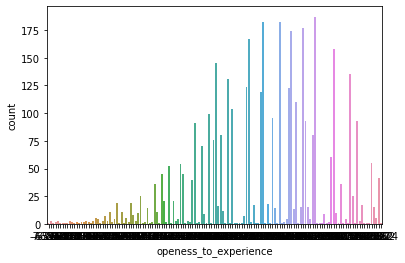

In [91]:
sns.countplot(x ='openess_to_experience', data = df)

- Bivariate Analysis

<AxesSubplot:xlabel='ID', ylabel='Salary'>

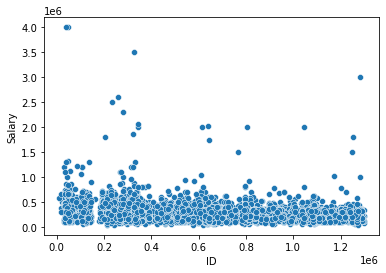

In [104]:
#scatterplot
sns.scatterplot(data=df, x="ID", y="Salary")

<AxesSubplot:xlabel='DOJ', ylabel='Salary'>

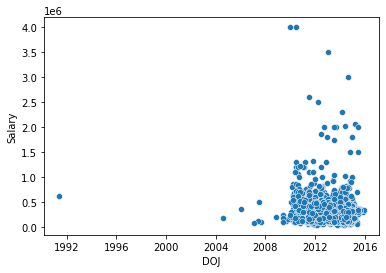

In [105]:
sns.scatterplot(data=df, x="DOJ", y="Salary")

<AxesSubplot:xlabel='10percentage', ylabel='12percentage'>

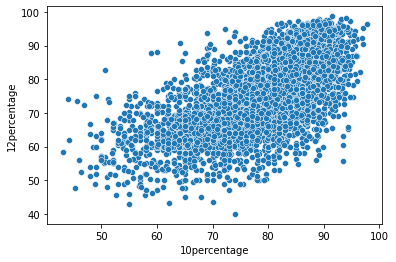

In [107]:
sns.scatterplot(data=df, x="10percentage", y="12percentage")

<AxesSubplot:xlabel='CollegeID', ylabel='CollegeTier'>

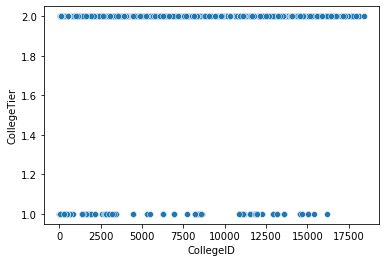

In [109]:
sns.scatterplot(data=df, x="CollegeID", y="CollegeTier")

<AxesSubplot:xlabel='collegeGPA', ylabel='CollegeCityID'>

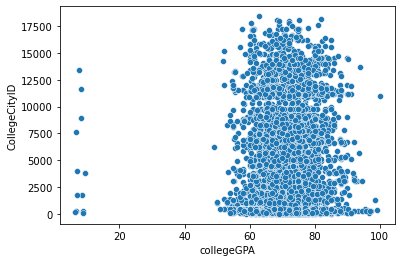

In [111]:
sns.scatterplot(data=df, x="collegeGPA", y="CollegeCityID")

<AxesSubplot:xlabel='CollegeCityTier', ylabel='CollegeState'>

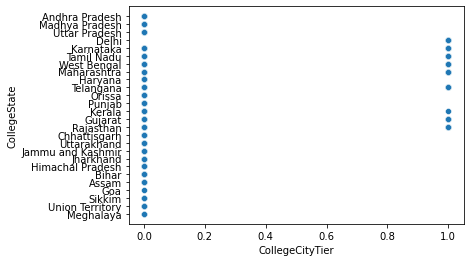

In [112]:
sns.scatterplot(data=df, x="CollegeCityTier", y="CollegeState")

<AxesSubplot:xlabel='GraduationYear', ylabel='English'>

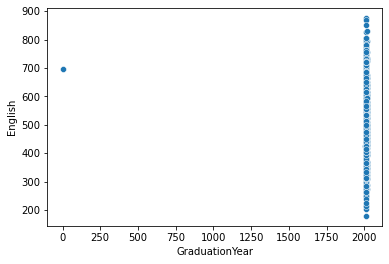

In [114]:
sns.scatterplot(data=df, x="GraduationYear", y="English")

<AxesSubplot:xlabel='English', ylabel='Logical'>

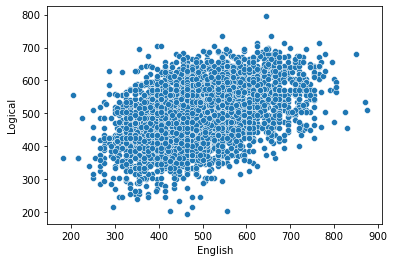

In [115]:
sns.scatterplot(data=df, x="English", y="Logical")

<AxesSubplot:xlabel='Quant', ylabel='Domain'>

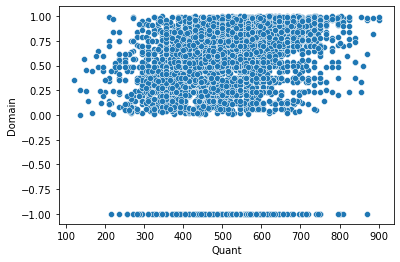

In [116]:
sns.scatterplot(data=df, x="Quant", y="Domain")

<AxesSubplot:xlabel='ComputerProgramming', ylabel='ElectronicsAndSemicon'>

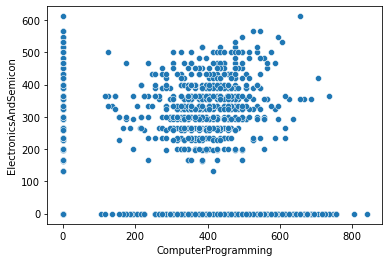

In [117]:
sns.scatterplot(data=df, x="ComputerProgramming", y="ElectronicsAndSemicon")

<AxesSubplot:xlabel='ComputerScience', ylabel='MechanicalEngg'>

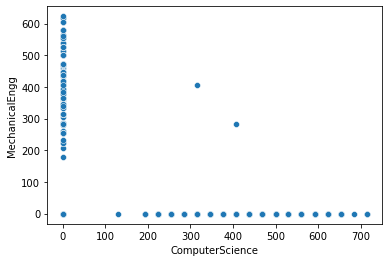

In [118]:
sns.scatterplot(data=df, x="ComputerScience", y="MechanicalEngg")

<AxesSubplot:xlabel='ElectricalEngg', ylabel='TelecomEngg'>

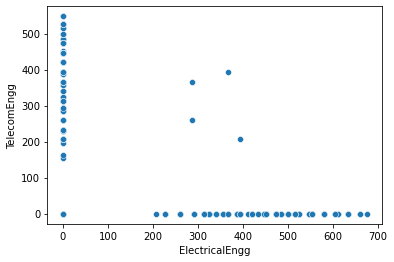

In [119]:
sns.scatterplot(data=df, x="ElectricalEngg", y="TelecomEngg")

<AxesSubplot:xlabel='CivilEngg', ylabel='conscientiousness'>

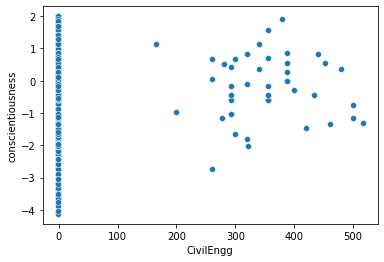

In [120]:
sns.scatterplot(data=df, x="CivilEngg", y="conscientiousness")

<AxesSubplot:xlabel='agreeableness', ylabel='extraversion'>

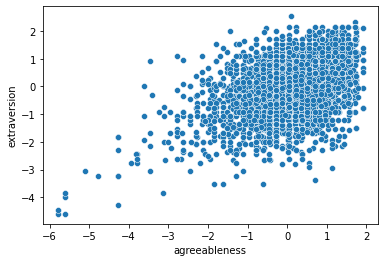

In [121]:
sns.scatterplot(data=df, x="agreeableness", y="extraversion")

<AxesSubplot:xlabel='nueroticism', ylabel='extraversion'>

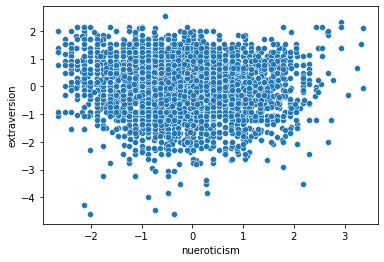

In [125]:
sns.scatterplot(data=df, x="nueroticism", y="extraversion")